In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 学習データ読み込み
train = np.loadtxt('kaiki.csv', delimiter = ',' , skiprows = 1 )

In [3]:
train_x = train[:,0]
train_y = train[:,1]

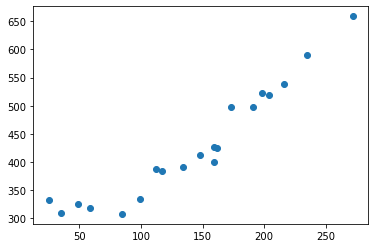

In [4]:
# プロット
plt.plot(train_x, train_y, 'o')
plt.show()

In [5]:
# 標準化
mu = train_x.mean()
sigma = train_x.std()
def standardize(x):
    return (x - mu) / sigma

train_z = standardize(train_x)

In [6]:
# パラメータを初期化
theta0 = np.random.rand()
theta1 = np.random.rand()

In [7]:
# 予測関数
def f(x):
    return theta0 + theta1 * x

In [8]:
# 目的関数
def E(x, y):
    return 0.5 * np.sum((y - f(x)) ** 2)

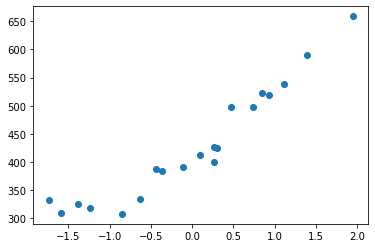

In [9]:
# プロット
plt.plot(train_z, train_y, 'o')
plt.show()

In [10]:
# 学習率
ETA = 1e-3
# 誤差の差分
diff = 1
# 更新回数
count = 0

In [11]:
# 誤差の差分が0.01以下になるまでパラメータ更新を繰り返す
error = E(train_z, train_y)
while diff > 1e-2:
    # 更新結果を一時変数に保存
    tmp_theta0 = theta0 - ETA * np.sum((f(train_z) - train_y))
    tmp_theta1 = theta1 - ETA * np.sum((f(train_z) - train_y) * train_z)

    # パラメータを更新
    theta0 = tmp_theta0
    theta1 = tmp_theta1

    # 前回の誤差との差分を計算
    current_error = E(train_z, train_y)
    diff = error - current_error
    error = current_error

    # ログの出力
    count += 1
    log = '{}回目: theta0 = {:.3f}, theta1 = {:.3f}, 差分 = {:.4f}'
    print(log.format(count, theta0, theta1, diff))

1回目: theta0 = 8.692, theta1 = 2.395, 差分 = 76314.2855
2回目: theta0 = 17.101, theta1 = 4.217, 差分 = 73292.2398
3回目: theta0 = 25.342, theta1 = 6.002, 差分 = 70389.8671
4回目: theta0 = 33.418, theta1 = 7.751, 差分 = 67602.4283
5回目: theta0 = 41.333, theta1 = 9.466, 差分 = 64925.3722
6回目: theta0 = 49.089, theta1 = 11.146, 差分 = 62354.3274
7回目: theta0 = 56.690, theta1 = 12.793, 差分 = 59885.0961
8回目: theta0 = 64.139, theta1 = 14.407, 差分 = 57513.6463
9回目: theta0 = 71.440, theta1 = 15.988, 差分 = 55236.1059
10回目: theta0 = 78.594, theta1 = 17.538, 差分 = 53048.7561
11回目: theta0 = 85.605, theta1 = 19.057, 差分 = 50948.0253
12回目: theta0 = 92.476, theta1 = 20.545, 差分 = 48930.4835
13回目: theta0 = 99.209, theta1 = 22.004, 差分 = 46992.8364
14回目: theta0 = 105.808, theta1 = 23.433, 差分 = 45131.9201
15回目: theta0 = 112.275, theta1 = 24.834, 差分 = 43344.6960
16回目: theta0 = 118.613, theta1 = 26.207, 差分 = 41628.2461
17回目: theta0 = 124.823, theta1 = 27.553, 差分 = 39979.7675
18回目: theta0 = 130.910, theta1 = 28.871, 差分 = 38396.5687
19

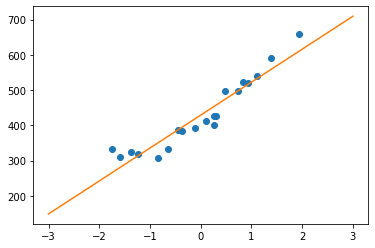

In [12]:
# プロットして確認
x = np.linspace(-3, 3, 100)
plt.plot(train_z, train_y, 'o')
plt.plot(x, f(x))
plt.show()

In [13]:
f(standardize(100))

370.9671120833828

In [14]:
f(standardize(200))

510.46967847266

In [15]:
f(standardize(150))

440.7183952780214